In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
data = pd.read_csv("howpop_train.csv")

Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [7]:
data.drop(filter(lambda c: c.endswith("_lognorm"), data.columns), axis=1, inplace=True)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [13]:
data['published']=pd.to_datetime(data.published, yearfirst=True) 

Создадим несколько столбцов на основе данных о времени публикации:


In [14]:
data["year"] = [d.year for d in data.published]
data["month"] = [d.month for d in data.published]
data["dayofweek"] = [d.isoweekday() for d in data.published]
data["hour"] = [d.hour for d in data.published]
data.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


## 1. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [15]:
pd.crosstab(data['month'], data['year'])

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
1,435,797,1010,1124,1167,1187,1133,1504,1717
2,496,812,1203,1072,1178,1186,1218,1793,1819
3,545,890,1257,1172,1416,1327,1238,2189,2115
4,597,840,1068,1178,1330,1298,1402,2110,1910
5,635,755,1012,1159,1388,1129,1193,1799,1726
6,599,733,1090,1439,1335,1244,1237,2004,1498
7,674,891,1152,1292,1340,1244,1372,2111,1278
8,677,956,1029,1315,1318,1291,1228,1849,1278
9,914,955,1129,1363,1331,1355,1408,1944,1482


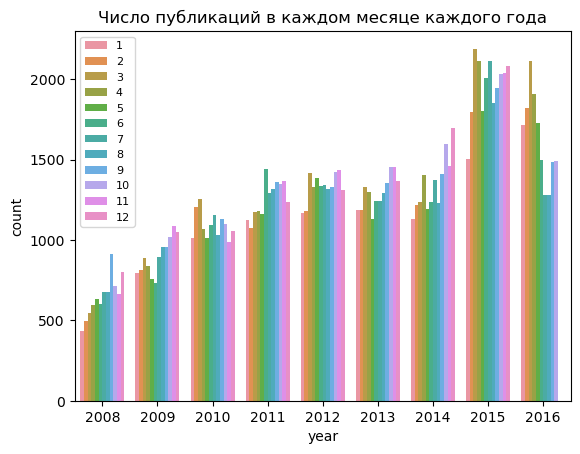

In [31]:
ax = sns.countplot( x = 'year', hue = 'month', data = data,)
ax.set_title('Число публикаций в каждом месяце каждого года')
ax.legend(loc = 'upper left', fontsize= '8')
#На графике видно что это 3 месяц 2015 года

## 2. Проанализируйте публикации в месяце из предыдущего вопроса

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Text(0.5, 1.0, 'Число публикаций от дня (март 2015)')

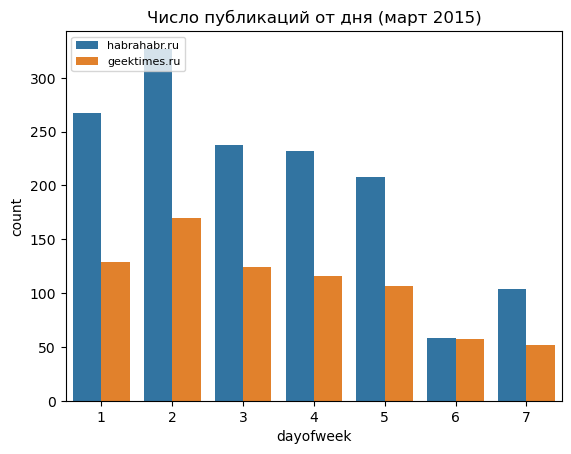

In [36]:
ax = sns.countplot( x = data[(data['month'] == 3) & (data['year'] == 2015)]['dayofweek'], hue = data['domain'])
ax.legend(loc = 'upper left', fontsize= '8')
ax.set_title('Число публикаций от дня (март 2015)')

## 3. Когда лучше всего публиковать статью? 

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

(0.0, 20000.0)

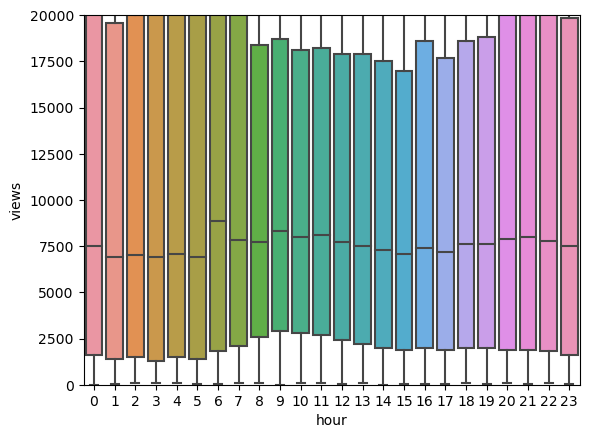

In [38]:
ax = sns.boxplot(x = 'hour', y = 'views', data = data)
ax.set_ylim(0, 20000)
ax.set_title('Число просмотров в среднем по времени')

(0.0, 100.0)

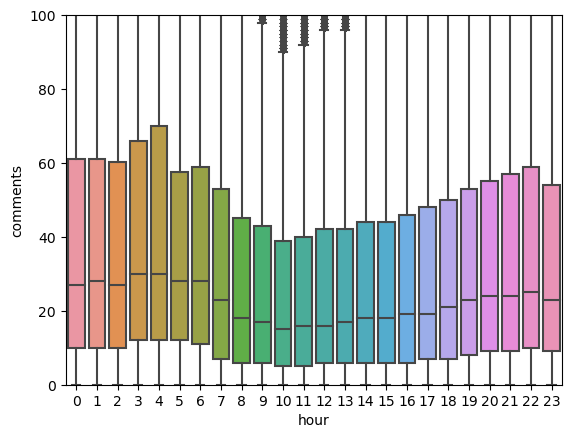

In [19]:
ax = sns.boxplot(x = 'hour', y = 'comments', data = data)
ax.set_ylim(0, 100)

(0.0, 100.0)

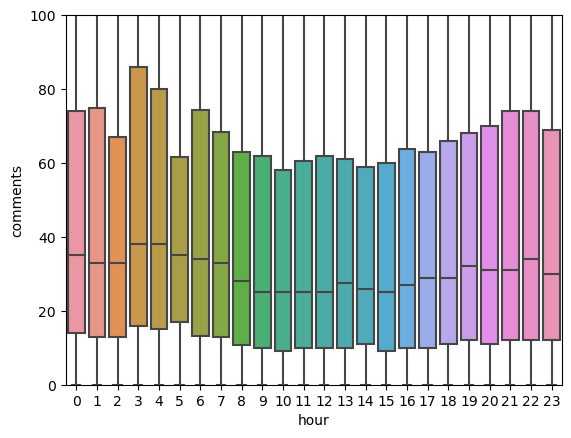

In [20]:
ax= sns.boxplot(x = data[data['domain'] == 'geektimes.ru']['hour'], y = data['comments'])
ax.set_ylim(0, 100)

## 4. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

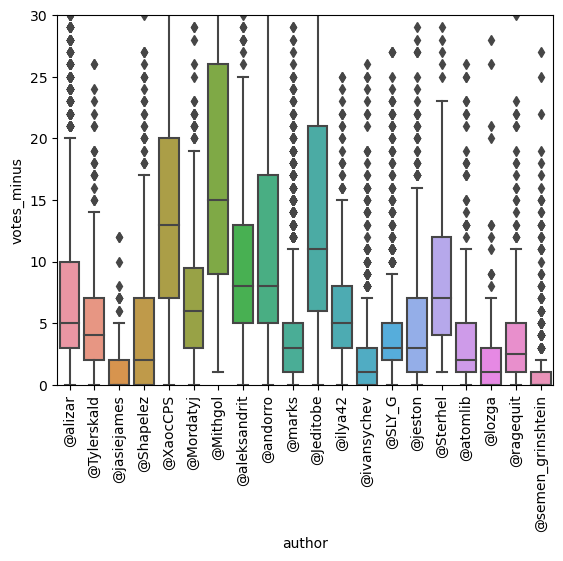

In [44]:
top_authors = data['author'].value_counts().head(20).index
ax = sns.boxplot(x = 'author', y = 'votes_minus', data=data[data['author'].isin(top_authors)])
ax.set_ylim(0, 30)
plt.xticks(rotation=90);

## 5. Сравните субботы и понедельники. 
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [22]:
data[data['dayofweek'] == 6]['hour'].median(),\
data[data['dayofweek'] == 1]['hour'].median()

(15.0, 14.0)

<Axes: xlabel='hour'>

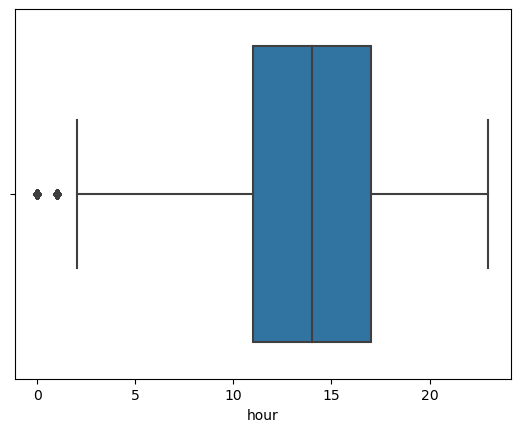

In [24]:
sns.boxplot(x = data[data['dayofweek'] == 1]['hour'])
#понедельник 

<Axes: xlabel='hour'>

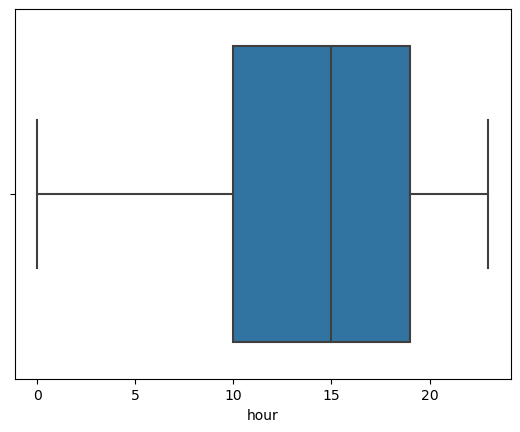

In [25]:
sns.boxplot(x = data[data['dayofweek'] == 6]['hour'])
#cуббота 